## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
DATADIR = '/Users/menfi/Documents/nanoDegree12September2017/analyze_A_B_test_results/AnalyzeABTestResults'  
DATAFILE = 'ab_data.csv'
# DATAFILE = 'ab_data_short.csv'
ab_data_csv = os.path.join(DATADIR, DATAFILE)

df = pd.read_csv(ab_data_csv) # DataFrame
# verify requirement compliance 
# print("type(df) = {}".format(type(df))) # DataFrame

print("df.head()")
print(df.head())
print()


df.head()
   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1



b. Use the below cell to find the number of rows in the dataset.

In [3]:
df_row_count = df.shape[0]
print("df_row_count - {}".format(df_row_count))
# os level row count verification
# +1 header row  user_id,timestamp,group,landing_page,converted

# $ wc -l ab_data.csv 
# 294479 ab_data.csv - checks out!
# Udacity Instructor - Practical Stats Project Walkthrough Final - 294478 - again checks out


df_row_count - 294478


c. The number of unique users in the dataset.

In [4]:
number_unique_users_in_dataset = df.user_id.nunique()
print("number_unique_users_in_dataset - {}".format(number_unique_users_in_dataset))
# Udacity Instructor - Practical Stats Project Walkthrough Final - 290584 - checks out


number_unique_users_in_dataset - 290584


d. The proportion of users converted.

In [5]:
# Mike way 
df_unique_conversions_row_count = df.query("converted == 1 ").user_id.nunique()
print("df_unique_conversions_row_count - {}".format(df_unique_conversions_row_count))
print("number_unique_users_in_dataset - {}".format(number_unique_users_in_dataset))
proportion_of_users_converted_mike = df_unique_conversions_row_count / number_unique_users_in_dataset
print("proportion_of_users_converted_mike - {}".format(proportion_of_users_converted_mike))
#
# Udacity Instructor - Practical Stats Project Walkthrough Final - 0.11965919355605512 - checks out
# df.converted.mean()
proportion_of_users_converted = df.converted.mean()
print("proportion_of_users_converted - {}\n".format(proportion_of_users_converted))


df_unique_conversions_row_count - 35173
number_unique_users_in_dataset - 290584
proportion_of_users_converted_mike - 0.12104245244060237
proportion_of_users_converted - 0.11965919355605512



e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
group_treatment = df.query("group == 'treatment'") 
wrong_landing_page_count = group_treatment.query("landing_page != 'new_page'").shape[0]
print("wrong_landing_page_count - {}".format(wrong_landing_page_count)) 

landing_page_new_page = df.query("landing_page == 'new_page'")
wrong_group_count = landing_page_new_page.query("group != 'treatment'").shape[0]
print("wrong_group_count - {}".format(wrong_group_count)) 

number_of_times_new_page_treatment_do_not_line_up = wrong_landing_page_count + wrong_group_count
print("number_of_times_new_page_treatment_do_not_line_up  - {}".format(number_of_times_new_page_treatment_do_not_line_up ))
# Udacity Instructor - Practical Stats Project Walkthrough Final - 3893 - checks out


wrong_landing_page_count - 1965
wrong_group_count - 1928
number_of_times_new_page_treatment_do_not_line_up  - 3893


f. Do any of the rows have missing values?

In [7]:
# missing values no - look 2 different ways 
null_check = df[df.isnull().any(axis=1)]
print("null_check - {}\n".format(null_check))

null_check1 = df.isnull().values.any()
print("null_check1 - {}\n".format(null_check1))
# Udacity Instructor - Practical Stats Project Walkthrough Final - same answer
 

null_check - Empty DataFrame
Columns: [user_id, timestamp, group, landing_page, converted]
Index: []

null_check1 - False



`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Data Analyst Nanodegree
# 4. Practical Statistics - Project: Analyze A/B Test Results - 3. Quiz: Quiz2: Messy Data
# Corrrect answer - Remove these rows.

df_row_count = df.shape[0]
print("df_row_count - {}".format(df_row_count))

df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')") 
df2_row_count = df2.shape[0]
print("df2_row_count - {}".format(df2_row_count))
    

df_row_count - 294478
df2_row_count - 290585


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2_unique_user_id_count = df2.user_id.nunique()
print("df2_unique_user_id_count - {}".format(df2_unique_user_id_count))


df2_unique_user_id_count - 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# df2.duplicated(subset=None, keep='first')[source]
# df2.duplicated(subset = 'user_id', keep='first')
df2.duplicated(subset = 'user_id', keep=False)

df2_duplicate_rows = df2[df2.duplicated(subset = 'user_id', keep=False)]
print("df2_duplicate_rows - {}".format(df2_duplicate_rows))

# df2_duplicate_rows -       user_id                   timestamp      group landing_page  converted
# 1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
# 2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


df2_duplicate_rows -       user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [12]:
# two ways 
print("df2_duplicate_rows - {}\n".format(df2_duplicate_rows))

duplicate_id_dataframe = df2.query('user_id == 773192') 
print("duplicate_id_dataframe - {}".format(duplicate_id_dataframe))


df2_duplicate_rows -       user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

duplicate_id_dataframe -       user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# keep one of the duplicate rows
df2 = df2.drop_duplicates(['user_id'], keep='last')

# row count drop by one 290585 - 290584 (unique user_id count) 
df2_row_count = df2.shape[0]
print("df2_row_count - {}\n".format(df2_row_count))

# should only be one row now
row_check_773192 = df2.query('user_id == 773192') 
print("row_check_773192 - {}".format(row_check_773192))


df2_row_count - 290584

row_check_773192 -       user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# make sure df2 row count is as expected 
df2_row_count = df2.shape[0]
print("df2_row_count - {}".format(df2_row_count))

df2_did_convert_row_count = df2.query('converted == 1').shape[0] 
print("df2_did_convert_row_count - {}".format(df2_did_convert_row_count))
 
probability_of_an_individual_converting = df2_did_convert_row_count / df2_row_count
print("probability_of_an_individual_converting - {}".format(probability_of_an_individual_converting))


df2_row_count - 290584
df2_did_convert_row_count - 34753
probability_of_an_individual_converting - 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_group_row_count = df2.query("group == 'control'").shape[0] 
print("control_group_row_count - {}".format(control_group_row_count))

control_group_converted_row_count = df2.query("group == 'control' and converted == 1").shape[0] 
print("control_group_converted_row_count - {}".format(control_group_converted_row_count))

control_group_probability_converted = control_group_converted_row_count / control_group_row_count
print("control_group_probability_converted - {}".format(control_group_probability_converted))


control_group_row_count - 145274
control_group_converted_row_count - 17489
control_group_probability_converted - 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_group_row_count = df2.query("group == 'treatment'").shape[0] 
print("treatment_group_row_count - {}".format(treatment_group_row_count))

treatment_group_conversion_row_count = df2.query("group == 'treatment' and converted == 1").shape[0] 
print("treatment_group_conversion_row_count - {}".format(treatment_group_conversion_row_count))

treatment_group_conversion_probability = treatment_group_conversion_row_count / treatment_group_row_count
print("treatment_group_conversion_probability - {}".format(treatment_group_conversion_probability))


treatment_group_row_count - 145310
treatment_group_conversion_row_count - 17264
treatment_group_conversion_probability - 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
received_new_page_row_count = df2.query("landing_page == 'new_page'").shape[0] 
print("received_new_page_row_count - {}".format(received_new_page_row_count))
probability_received_new_page = received_new_page_row_count / df2_row_count
print("probability_received_new_page - {}\n".format(probability_received_new_page))

received_old_page_row_count = df2.query("landing_page == 'old_page'").shape[0] 
print("received_old_page_row_count - {}".format(received_old_page_row_count))
probability_received_old_page = received_old_page_row_count / df2_row_count
print("probability_received_old_page - {}\n".format(probability_received_old_page))

# reasonableness check
received_either_page_count = received_new_page_row_count + received_old_page_row_count
print("received_either_page_count - {}".format(received_either_page_count))
print("df2_row_count - {}".format(df2_row_count))
 

received_new_page_row_count - 145310
probability_received_new_page - 0.5000619442226688

received_old_page_row_count - 145274
probability_received_old_page - 0.4999380557773312

received_either_page_count - 290584
df2_row_count - 290584


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**  
What we know - 

Given - An individual DID received the treatment, the probability of converting. - 0.1188 - (probabilty LOW)

The probability of receiving the new page. - 0.5001 - (close to 50 / 50)

received_new_page_count - 145310  
probability_received_new_page - 0.5000619442226688 - (close to 50 / 50)

received_old_page_count - 145274  
probability_received_old_page - 0.4999380557773312 - (close to 50 / 50)

Based on what we know I do not think there is significant evidence that one page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.  

**Put your answer here.**  
H0 pnew ≤ pold - null hypothesis  
H1 pnew > pold - alternative hypothesis
$$H_0: p_{new} \leq p_{old}$$
$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [18]:
# academic data analysis of dataset - ab_data.csv
# %load_ext autoreload
# %reload_ext autoreload

# data analysis 
# df2_row_count - 290584
print("df2_row_count - {}\n".format(df2_row_count))

# control
control = df2.query("group == 'control'") 
# print("control  - {}\n".format(control))

# control_count  - 145274
control_count = df2.query("group == 'control'").shape[0] 
print("control_count  - {}\n".format(control_count))

# control_new_page_count - 0 - NO group-control landing_page - new_page
control_new_page_count = control.query("landing_page == 'new_page'").shape[0]
print("control_new_page_count - {}\n".format(control_new_page_count))

# control_old_page_count - 145274 - all group control - landing_page IS old_page
control_old_page_count = control.query("landing_page == 'old_page'").shape[0]
print("control_old_page_count - {}".format(control_old_page_count))
assert control_count == control_old_page_count, "check control_count, control_old_page_count"

control_old_page_converted_count = df2.query("group == 'control' and landing_page == 'old_page' and converted == 1").shape[0] 
print("control_old_page_converted_count - {}".format(control_old_page_converted_count))
proportion_control_old_page_converted = control_old_page_converted_count / control_old_page_count
print("proportion_control_old_page_converted - {}".format(proportion_control_old_page_converted))

control_old_page_not_converted_count = df2.query("group == 'control' and landing_page == 'old_page' and converted == 0").shape[0] 
print("control_old_page_not_converted_count - {}".format(control_old_page_not_converted_count))
assert control_old_page_count == control_old_page_converted_count + control_old_page_not_converted_count, "check control_old_page_count, control_old_page_converted_count + control_old_page_not_converted_count"  
proportion_control_old_page_not_converted = control_old_page_not_converted_count / control_old_page_count
print("proportion_control_old_page_not_converted - {}".format(proportion_control_old_page_not_converted))

control_old_page_converted_sum = control_old_page_converted_count + control_old_page_not_converted_count 
print("control_old_page_converted_sum - {}\n".format(control_old_page_converted_sum))
assert control_old_page_converted_sum == control_count, "check control_old_page_converted_sum"

# 145310
treatment_count = df2.query("group == 'treatment'").shape[0] 
print("treatment_count  - {}\n".format(treatment_count))

dataframe_row_count_sum = control_count + treatment_count
print("dataframe_row_count_sum - {}\n".format(dataframe_row_count_sum))
assert dataframe_row_count_sum == df2_row_count, "check dataframe_row_count_sum"

treatment_new_page_count = df2.query("group == 'treatment' and landing_page == 'new_page'").shape[0]
print("treatment_new_page_count - {}".format(treatment_new_page_count))

control_treatment_page_sum = control_old_page_count + treatment_new_page_count
print("control_treatment_page_sum - {}\n".format(control_treatment_page_sum))
assert control_treatment_page_sum == df2_row_count, "check control_treatment_page_sum"

#zero
treatment_old_page_count = df2.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
print("treatment_old_page_count - {}".format(treatment_old_page_count))

treatment_new_page_converted_count = df2.query("group == 'treatment' and landing_page == 'new_page' and converted == 1").shape[0] 
print("treatment_new_page_converted_count - {}".format(treatment_new_page_converted_count))
proportion_treatment_new_page_converted = treatment_new_page_converted_count / treatment_count
print("proportion_treatment_new_page_converted - {}".format(proportion_treatment_new_page_converted))

treatment_new_page_not_converted_count = df2.query("group == 'treatment' and landing_page == 'new_page' and converted == 0").shape[0] 
print("treatment_new_page_not_converted_count - {}".format(treatment_new_page_not_converted_count))
proportion_treatment_new_page_not_converted = treatment_new_page_not_converted_count / treatment_count
print("proportion_treatment_new_page_not_converted - {}".format(proportion_treatment_new_page_not_converted))

treatment_new_page_converted_sum = treatment_new_page_not_converted_count + treatment_new_page_converted_count
print("treatment_new_page_converted_sum - {}\n".format(treatment_new_page_converted_sum))
assert treatment_new_page_converted_sum == treatment_count, "check treatment_new_page_converted_sum, treatment_count"

# double check - we indeed have the right rows
df2.query("(group == 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page == 'old_page')").shape[0]


df2_row_count - 290584

control_count  - 145274

control_new_page_count - 0

control_old_page_count - 145274
control_old_page_converted_count - 17489
proportion_control_old_page_converted - 0.1203863045004612
control_old_page_not_converted_count - 127785
proportion_control_old_page_not_converted - 0.8796136954995388
control_old_page_converted_sum - 145274

treatment_count  - 145310

dataframe_row_count_sum - 290584

treatment_new_page_count - 145310
control_treatment_page_sum - 290584

treatment_old_page_count - 0
treatment_new_page_converted_count - 17264
proportion_treatment_new_page_converted - 0.11880806551510564
treatment_new_page_not_converted_count - 128046
proportion_treatment_new_page_not_converted - 0.8811919344848944
treatment_new_page_converted_sum - 145310



290584

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# assume they are equal to the converted rate in ab_data.csv regardless of the page. 
# divide df2 converted rows, converted column = 1, by total df2 rows
# correct answer - reference Project A/B Test Results Quiz 5 Hypothesis Testing 
p_new = df2.query("converted == 1").shape[0] / df2.shape[0] 
# 0.11959708724499628
print("p_new - 0.11959708724499628 - {}".format(p_new))


p_new - 0.11959708724499628 - 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# assume they are equal to the converted rate in ab_data.csv regardless of the page. 
# divide df2 converted rows, converted column = 1, by total df2 rows
# correct answer - reference Project A/B Test Results Quiz 5 Hypothesis Testing 
# 0.11959708724499628
p_old = df2.query("converted == 1").shape[0] / df2.shape[0] 
print("p_old - 0.11959708724499628 - {}".format(p_old))


p_old - 0.11959708724499628 - 0.11959708724499628


c. What is $n_{new}$?

In [21]:
# n_new - 145310 - reference graded Udacity Quiz
# Data Analyst Nanodegree - 4. Practical Statistics - Project: Analyze A/B Test Results 
# Quiz 5: Hypothesis Testing - n_new
n_new = df2.query("group == 'treatment'  and  landing_page == 'new_page' ").shape[0]
print("n_new - 145310 - {}\n".format(n_new))


n_new - 145310 - 145310



d. What is $n_{old}$?

In [22]:
# n_old - 145274 - reference graded Udacity Quiz
# Data Analyst Nanodegree - 4. Practical Statistics - Project: Analyze A/B Test Results 
# Quiz 5: Hypothesis Testing - n_nold
n_old = df2.query("group == 'control'  and  landing_page == 'old_page' ").shape[0]
print("n_old - 145274 - {}".format(n_old))


n_old - 145274 - 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
np.random.seed(42)
# make sure we have the right values
print("n_new - 145310 - {}".format(n_new))
print("p_new - 0.11959708724499628 - {}".format(p_new))
# hard code an example for comparison - get an idea 
# new_page_converted_example = n_new * p_new
# print("new_page_converted_example - {}".format(new_page_converted_example))
#        new_page_converted_example - 17378.65274757041

# press on with simulation
new_page_converted = np.random.binomial(n_new, p_new) 
print("new_page_converted - 17257 - {}".format(new_page_converted)) 


n_new - 145310 - 145310
p_new - 0.11959708724499628 - 0.11959708724499628
new_page_converted - 17257 - 17257


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
np.random.seed(42)
# make sure we have the right values 
print("n_old - 145274 - {}".format(n_old))
print("p_old - 0.11959708724499628 - {}".format(p_old))
# hard code 1, get an idea 
# print(n_old * p_old)
# 17374.34725242959

# press on with simulation
old_page_converted = np.random.binomial(n_old, p_old) 
print("old_page_converted - 17253 - {}".format(old_page_converted))


n_old - 145274 - 145274
p_old - 0.11959708724499628 - 0.11959708724499628
old_page_converted - 17253 - 17253


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
print("new_page_converted - 17257 - {}".format(new_page_converted)) 
print("n_new - 145310 - {}".format(n_new))
print("old_page_converted - 17253 - {}".format(old_page_converted))
print("n_old - 145274 - {}\n".format(n_old))

p_new_minus_p_old = (new_page_converted / n_new) -  (old_page_converted / n_old)
print("p_new_minus_p_old - {}".format(p_new_minus_p_old))


new_page_converted - 17257 - 17257
n_new - 145310 - 145310
old_page_converted - 17253 - 17253
n_old - 145274 - 145274

p_new_minus_p_old - -1.8954261268994133e-06


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [26]:
np.random.seed(42)

# print("n_new - 145310 - {}".format(n_new))
# print("p_new 0.11959708724499628 - {}\n".format(p_new))
# print("n_old - 145274 - {}".format(n_old))
# print("p_old - 0.11959708724499628 - {}".format(p_old)) 
p_diffs = [] 
# simulate sampling distribution with bootstrapping
for _ in range(10000): # ** fix 10000 **
    diff = 0 
    # npc - new page converted
    npc = np.random.binomial(n_new, p_new)

    # opc - old page converted
    opc = np.random.binomial(n_old, p_old) 
    # print("npc - {}".format(npc))

    if _ < 0: # development
        print("n_new - 145310 - {}".format(n_new))
        print("p_new 0.11959708724499628 - {}".format(p_new))
        print("n_old - 145274 - {}".format(n_old))
        print("p_old - 0.11959708724499628 - {}".format(p_old)) 
        print("npc - {}".format(npc))
        print("opc - {}\n".format(opc))

    diff = (npc / n_new) - (opc / n_old)
    p_diffs.append(diff)

print("len(p_diffs) - {}".format(len(p_diffs)))
 

len(p_diffs) - 10000


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

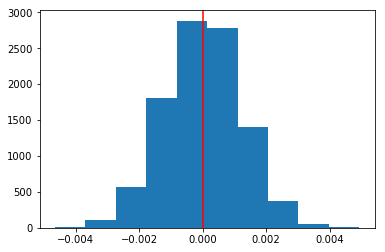

In [27]:
plt.hist(p_diffs)
plt.axvline(x = p_new_minus_p_old, color='red');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
 
proportion_control_converted = df[df['group'] == 'control']['converted'].mean()
print("proportion_control_converted - {}".format(proportion_control_converted))

proportion_treatment_converted = df[df['group'] == 'treatment']['converted'].mean()
print("proportion_treatment_converted - {}".format(proportion_treatment_converted))
#proportion_p_diffs_greater_actual_difference = (actual_difference < p_diffs).mean()

# actual_difference < p_diffs

#print("proportion_p_diffs_greater_actual_difference - {}".format(proportion_p_diffs_greater_actual_difference))

actual_difference = proportion_treatment_converted - proportion_control_converted
print("actual_difference - {}".format(actual_difference))
proportion_pdiffs_greater = sum(i > actual_difference for i in p_diffs) / len(p_diffs)
print("proportion_pdiffs_greater - {}\n".format(proportion_pdiffs_greater))


proportion_control_converted - 0.12039917935897611
proportion_treatment_converted - 0.11891957956489856
actual_difference - -0.0014795997940775518
proportion_pdiffs_greater - 0.8897



k. In words, explain what you just computed in part **j.**   What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**   
Computed in part j - The proportion of p_diffs greater than the actual difference observed in ab_data.csv?   
What is this value called in scientific studies - p-value   

What does this value mean in terms of whether or not there is a difference between the new and old pages?   
Given - Type 1 Error Rate, α, 5%, 0.05, p-value greater than α, therefore fail to reject the null hypothesis.  


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:

convert_old_count = df2.query("group == 'control' and converted == 1").shape[0]
print("convert_old_count - {}".format(convert_old_count))
 
convert_new_count = df2.query("group == 'treatment' and converted == 1").shape[0] 
print("convert_new_count - {}".format(convert_new_count))
 
print("n_old - {}".format(n_old))
print("n_new - {}".format(n_new))

import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310


convert_old_count - 17489
convert_new_count - 17264
n_old - 145274
n_new - 145310


/Users/menfi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
 
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print("p_value - {}\n".format(p_value)) 


p_value - 0.9050583127590245



n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**   
Here again p-value is greater than α, fail to reject the null. This is in agreement with parts j., k. in both cases we fail to reject the null. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**  
logistic regression model

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:

# Add an intercept column - requirements compliance 
df2['intercept'] = 1

# from lecture
# df2[['control', 'treatment']] = pd.get_dummies(df2['group']) 

# Rather than just copy from lecture, find out what the code does.
# What does this code do? Start with the dataframe - df2.
# print('df2.head(2)')
# print(df2.head(10))
# print()
#    user_id timestamp                  group   landing_page   converted   intercept  
# 0  851104  2017-01-21 22:11:48.556739 control old_page       0           1
# 1  804228  2017-01-12 08:01:45.159739 control old_page       0          1

# pd.get_dummies(df2['group']) builds out two new columns, 'column', 'treatment' from df2 'group' column
# if DataFrame row 'group' is control - 'control' column - 1, 'treatment' column 0
# if DataFrame row 'group' is 'treatment' - 'control' column - 0, 'treatment' column 1

# temp_df = pd.get_dummies(df2['group'])
# print('temp_df.head(10)')
# print(temp_df.head(10))
# print()
#          control    treatment
# 0        1          0
# 1        1          0

# build out the new 'control' and 'ab_page' colums based on the 'group' column  
# requirements compliance -  ... as well as an ab_page column, 
# which is 1 when an individual receives the treatment and 0 if control.
df2[['control', 'ab_page']] = pd.get_dummies(df2['group']) 

print("\ndf2.head(2)")
print(df2.head(2))
print()

#   user_id   timestamp                     group       landing_page      converted
# 0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
# 1   804228  2017-01-12 08:01:45.159739    control     old_page          0

#            intercept control  ab_page  
# 0          1         1        0  
# 1          1         1        0 



df2.head(2)
   user_id                   timestamp    group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739  control     old_page          0   
1   804228  2017-01-12 08:01:45.159739  control     old_page          0   

   intercept  control  ab_page  
0          1        1        0  
1          1        1        0  



c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
import statsmodels.api as sm
# logit = sm.Logit(df2['converted'], df2(['intercept', 'ab_page']))
#df2['converted']
# df2[['intercept', 'ab_page']]

logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) #'statsmodels.discrete.discrete_model.Logit'
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
print('results.summary()')
print(results.summary())
print()
# note p value for ab_page is 0.190
# fail to reject null at 5% Type 1 error rate α = 0.05

results.summary()
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        09:46:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007



e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value associated with ab_page - 0.190  
Differs from Part II, because Part II - one sided test   
Part III - regression - two sided test  
What are the null and alternative hypotheses associated with your regression model?
$$H_0: p_{new} = p_{old}$$
$$H_1: p_{new} \neq p_{old}$$   

Null and alternative hypotheses in Part II?
$$H_0: p_{new} \leq p_{old}$$
$$H_1: p_{new} > p_{old}$$



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**  
Simpson's paradox.  The granualrity or the aggregate of the study 

The granularity or the aggregate of the study is an example.   
One could study all Nanodegrees in the aggregate or 
individual Nanodegrees.   
old page, new page conversion rates may differ, and / or lose or gain statistical significance.   
   
Another example is Data Analyst Nanodegree - Term 1 - Lesson 15: Multiple Linear Regression.  When bathrooms,
bedrooms, and area were analyzed independently (simple linear regression) all 3 factors were shown to effect home price.  p-value indicated the 
effect was statistically significant.  When a multiple linear regression was run, with all 3 factors, only area was statistically significant.  
These are two examples where considering other factors is required for valid statistically significant analysis.   
     

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# bring in the new countries.csv data
DATADIR = '/Users/menfi/Documents/nanoDegree12September2017/analyze_A_B_test_results/AnalyzeABTestResults'  
DATAFILE = 'countries.csv'

countries_csv = os.path.join(DATADIR, DATAFILE)
countries_df = pd.read_csv(countries_csv) # DataFrame

print("countries_df.head()")
print(countries_df.head())
print()
 
# join the new countries_df - join on new index 'user_id' - column common to both joined DataFrames
    
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')

print("df_new.head()")
print(df_new.head())
print() 


countries_df.head()
   user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

df_new.head()
        country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  control  ab_page  
user_id                                          
834778           0          1        1        0  
928468           0          1        0        1  
822059           1          1        0        1  
711597           0          1        1        0  
710616           0          1        0        1  



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [35]:
df_new['country'].value_counts() # US 203619, UK 72466, CA 14499
# 3 countries 2 dummies required 

# CA - Canada column added
# CA - Canada column, 0 if row is UK, US 

# US - United States column added
# US - United States column, 0 if row is UK, CA 

pd.get_dummies(df_new['country'])[['CA', 'US']]

df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA', 'US']]

print("df_new.head()")
print(df_new.head())
print()



df_new.head()
        country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  control  ab_page  CA  US  
user_id                                                  
834778           0          1        1        0   0   0  
928468           0          1        0        1   0   1  
822059           1          1        0        1   0   0  
711597           0          1        1        0   0   0  
710616           0          1        0        1   0   0  



In [36]:
#sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])

mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']]) # 'statsmodels.discrete.discrete_model.Logit'
results = mod.fit()
my_summary = results.summary()
print('my_summary')
print(my_summary)
print()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6
my_summary
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Dec 2017   Pseudo R-squ.:               1.521e-05
Time:                        09:46:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0

Does it appear that country had an impact on conversion? - Yes   
Provide the statistical output as well as a written response to answer this question.   
p-value US - 0.456, CA - 0.074
Given - Type 1 Error Rate, α, 5%, 0.05   
Both US, CA p-value greater than α, therefore fail to reject the null hypothesis, appears country had impact on conversion.      
<p>
   

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.